In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam.csv', encoding='latin')

In [3]:
df.sample(5)
#writes number of random samples ...returns a specified number of random rows.

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3897,ham,Otherwise had part time job na-tuition..,NaN,NaN,NaN
4469,ham,"Lemme know when I can swing by and pick up, I'...",NaN,NaN,NaN
2237,ham,"Give her something to drink, if she takes it a...",NaN,NaN,NaN
4667,ham,IM REALY SOZ IMAT MY MUMS 2NITE WHAT ABOUT 2MORO,NaN,NaN,NaN
4479,ham,Y cant u try new invention to fly..i'm not jok...,NaN,NaN,NaN


In [4]:
df.shape
#this function tells us how many rows are there n coloumns 

(5572, 5)

# number of process to perform during whole analysis

In [5]:
# 1.Data cleaning 
# 2.EDA
# 3.Text  Preprocessing
# 4.Model Building
# 5.Evaluation
# 6.Improvement 
# 7.Website 
# 8.deployement 

# 1.Data Cleaning 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)  
#df.drop(df.index[3], inplace=True)
df.sample(5)

,v1,v2
1607,ham,Jus telling u dat i'll b leaving 4 shanghai on...
991,ham,Hi im having the most relaxing time ever! we h...
3373,ham,Also andros ice etc etc
4700,ham,I liked the new mobile
2597,ham,"Got fujitsu, ibm, hp, toshiba... Got a lot of ..."


In [8]:
#columns eems to be non discriptive so we will rename it 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.sample(5)

,target,text
5535,ham,"I know you are thinkin malaria. But relax, chi..."
3425,ham,Sure but since my parents will be working on T...
2598,ham,Okie... Thanx...
3932,ham,"Playin space poker, u?"
4302,ham,Yup i'm free...


In [10]:
# spam n ham likha hua hai whn we want numbers toh we apply label encoder 
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# 1. for checking missing values in the data set
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# 2. for checking duplicate values 
df.duplicated().sum()

403

In [15]:
# now we will remove duplicates 
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

# 2.EXPLORATORY DATA ANALYSIS(EDA)

In [18]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()
#for counting how many spam n hams are there

0    4516
1     653
Name: target, dtype: int64

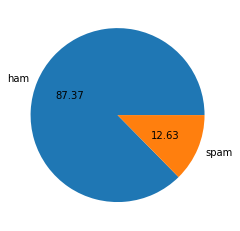

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
#iske baad kush extra text values show hori hai unko hatane k liye we will use
plt.show()


In [21]:
# conclusion 
# yeh nikla ki data is imbalanced 
# kafi jyada ham h


In [22]:
# next step is we can also check how many albhabets words n sentence n=r there in text

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
#nltk.download()

In [26]:
#! pip install --upgrade nltk

In [27]:
>>> nltk.set_proxy('http://proxy.example.com:3128', ('USERNAME', 'PASSWORD'))
>>> nltk.download()





showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [28]:
df['num_char']=df['text'].apply(len)

In [29]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# num of  words ,basically hum tokenize krre hai 
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [31]:
#length find krna hai words ka then 
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [32]:
# ab isko ek column mein dalenge toh 
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [33]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [34]:
# now we wil find the number of sentence 
df['sentence_count']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [35]:
df.head()


,target,text,num_char,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [36]:
df[['num_char','num_words','sentence_count']].describe()

,num_char,num_words,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [37]:
#we can analyse ham and spam separately 
#iss function ne ham ko lag kar dia ...now we use describe fucnton 
df[df['target']==0]

,target,text,num_char,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [38]:
df[df['target']==0][['num_char','num_words','sentence_count']].describe()
# this is for ham

,num_char,num_words,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
#spam ka analysis
df[df['target']==1]

,target,text,num_char,num_words,sentence_count
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
8,1,WINNER!! As a valued network customer you have...,158,32,5
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1


In [40]:
df[df['target']==1][['num_char','num_words','sentence_count']].describe()

,num_char,num_words,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [41]:

# for visualisation using histogram plot 
import seaborn as sns 

In [42]:
#extract all the ham mssgs 
df[df['target']==0]

,target,text,num_char,num_words,sentence_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [43]:
#usme se hum num char wala coloumn extarct krenge
df[df['target']==0]['num_char']

0       111
1        29
3        49
4        61
6        77
       ... 
5565     12
5568     37
5569     57
5570    125
5571     26
Name: num_char, Length: 4516, dtype: int64

<AxesSubplot:xlabel='num_char', ylabel='Count'>

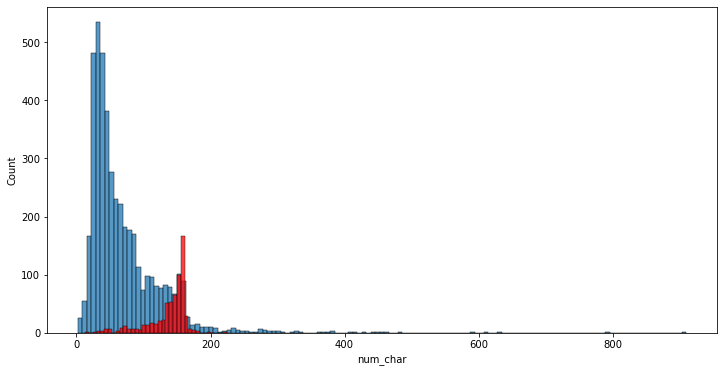

In [44]:
# then histo gram plot
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_char'])
#spam mssgs 
sns.histplot(df[df['target']==1]['num_char'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

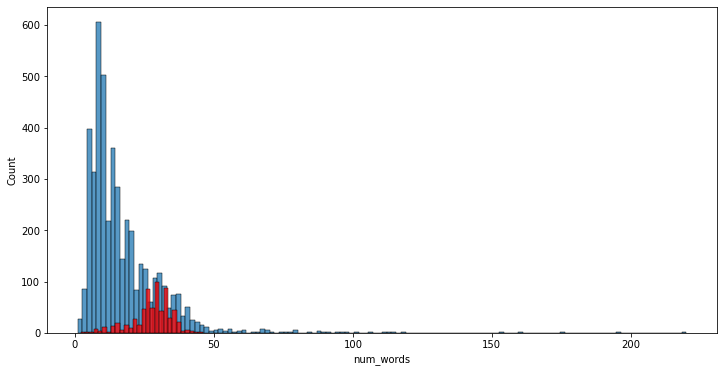

In [45]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
#spam mssgs 
sns.histplot(df[df['target']==1]['num_words'],color='red')

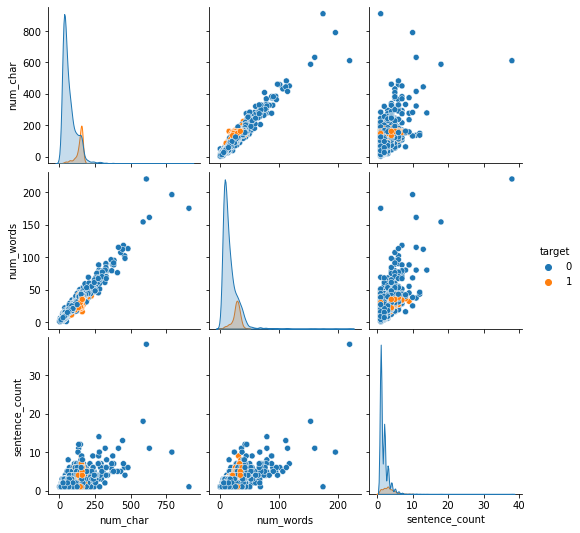

In [46]:
sns.pairplot(df,hue='target')

In [47]:
#to find correlation between the sentences
df.corr()

,target,num_char,num_words,sentence_count
target,1.000000,0.384717,0.262912,0.263939
num_char,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
sentence_count,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

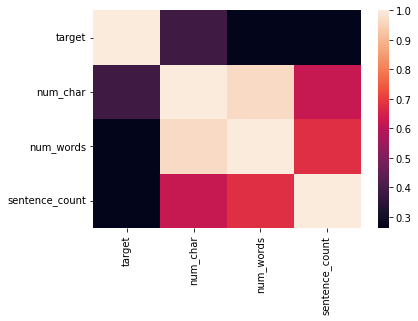

In [48]:
#iss correlation ko heat map se visualise krenge 
sns.heatmap(df.corr())

<AxesSubplot:>

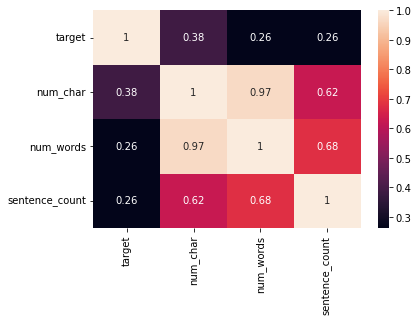

In [49]:
#annotation provide karenge
sns.heatmap(df.corr(),annot=True)

# 3.DATA PREPROCESSING
.lower case

.Tokenisation

.removing special characters

.removing stop words and punchuation

.stemming


In [50]:
import nltk 
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [51]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [52]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [53]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [54]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
 
    
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
  
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)    




In [55]:
transform_text("Hi like am Ridhima dancing and loving ?")

'hi like ridhima danc love'

In [56]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [57]:
df['text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [58]:
df['transformed_text']=df['text'].apply(transform_text)

In [59]:
df.head()

,target,text,num_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [60]:
# from nltk.corpus import stopwords
# stopwords.words('english')

In [61]:
# import string 
# string.punctuation

In [62]:
transform_text("hi how are you?")

'hi'

In [63]:
transform_text("did you like my thoughts?")

'like thought'

In [64]:
# df['text'][2]

In [65]:
# df['text'].apply(transform_text)

In [66]:
#adding in new coloumn
# df['transformed_text']= df['text'].apply(transform_text)

In [67]:
# df.head()

In [68]:
# we will make wordcloud
#we are generating the wordloud of spam msssgs 
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [69]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

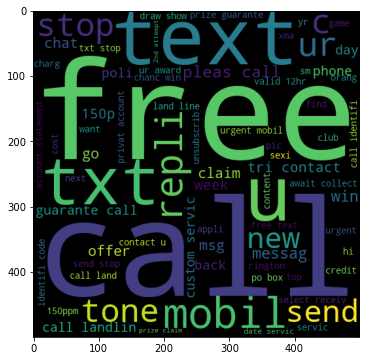

In [70]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [71]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

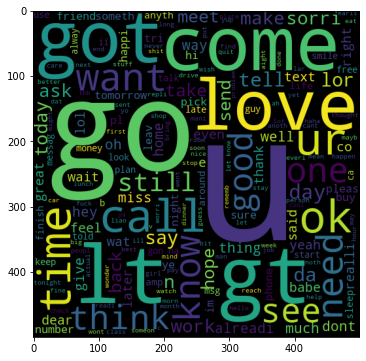

In [72]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [73]:
df.head()

,target,text,num_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [74]:
df[df['target']==1] 

,target,text,num_char,num_words,sentence_count,transformed_text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4,freemsg hey darl 3 week word back like fun sti...
8,1,WINNER!! As a valued network customer you have...,158,32,5,winner valu network custom select receivea pri...
9,1,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...
11,1,"SIX chances to win CASH! From 100 to 20,000 po...",136,31,3,six chanc win cash 100 pound txt csh11 send co...
...,...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,90,18,3,want explicit sex 30 sec ring 02073162414 cost...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,160,38,6,ask 3mobil 0870 chatlin inclu free min india c...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,147,30,1,remind o2 get pound free call credit detail gr...


In [75]:
df[df['target']==1]['transformed_text']

2       free entri 2 wkli comp win fa cup final tkt 21...
5       freemsg hey darl 3 week word back like fun sti...
8       winner valu network custom select receivea pri...
9       mobil 11 month u r entitl updat latest colour ...
11      six chanc win cash 100 pound txt csh11 send co...
                              ...                        
5537    want explicit sex 30 sec ring 02073162414 cost...
5540    ask 3mobil 0870 chatlin inclu free min india c...
5547    contract mobil 11 mnth latest motorola nokia e...
5566    remind o2 get pound free call credit detail gr...
5567    2nd time tri 2 contact u pound prize 2 claim e...
Name: transformed_text, Length: 653, dtype: object

In [76]:
#we will convert above into to list 
df[df['target']==1]['transformed_text'].tolist()

['free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18',
 'freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv',
 'winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour',
 'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030',
 'six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info',
 'urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18',
 'xxxmobilemovieclub use credit click wap link next txt messag click http',
 'england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq',
 'thank subscript rington uk mobil charg pleas confirm repli ye repli charg',
 '07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow',
 '

In [77]:
#mssgs print karna hai
for msg in df[df['target']==1]['transformed_text'].tolist():
    print(msg)

free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
freemsg hey darl 3 week word back like fun still tb ok xxx std chg send rcv
winner valu network custom select receivea prize reward claim call claim code kl341 valid 12 hour
mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030
six chanc win cash 100 pound txt csh11 send cost 6day tsandc appli repli hl 4 info
urgent 1 week free membership prize jackpot txt word claim 81010 c lccltd pobox 4403ldnw1a7rw18
xxxmobilemovieclub use credit click wap link next txt messag click http
england v macedonia dont miss news txt ur nation team 87077 eg england 87077 tri wale scotland poboxox36504w45wq
thank subscript rington uk mobil charg pleas confirm repli ye repli charg
07732584351 rodger burn msg tri call repli sm free nokia mobil free camcord pleas call 08000930705 deliveri tomorrow
sm ac sptv new jersey devil detroit red wi

In [78]:
# we want to separate all the words
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [79]:
spam_corpus

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [80]:
len(spam_corpus)

9939

In [81]:
#ab ek dictionary create krrehai hum jhn per hr words in spam ki frequency pta chalegi 
from collections import Counter
Counter(spam_corpus)

Counter({'free': 191,
         'entri': 21,
         '2': 155,
         'wkli': 9,
         'comp': 8,
         'win': 48,
         'fa': 2,
         'cup': 3,
         'final': 14,
         'tkt': 2,
         '21st': 1,
         'may': 6,
         'text': 122,
         '87121': 2,
         'receiv': 31,
         'question': 9,
         'std': 6,
         'txt': 141,
         'rate': 26,
         'c': 45,
         'appli': 24,
         '08452810075over18': 1,
         'freemsg': 14,
         'hey': 5,
         'darl': 2,
         '3': 20,
         'week': 49,
         'word': 21,
         'back': 20,
         'like': 12,
         'fun': 8,
         'still': 5,
         'tb': 1,
         'ok': 5,
         'xxx': 10,
         'chg': 2,
         'send': 60,
         'rcv': 2,
         'winner': 13,
         'valu': 8,
         'network': 26,
         'custom': 42,
         'select': 26,
         'receivea': 1,
         'prize': 82,
         'reward': 9,
         'claim': 98,
         'cal

In [82]:
#most common 30 nikalenge
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [83]:
from collections import Counter

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

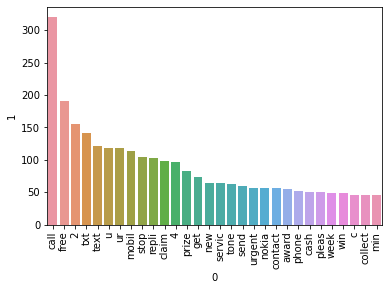

In [84]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
#x axis read ni kr pare h toh usko 
plt.xticks(rotation="vertical")

In [85]:

ham_corpus=[]
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [86]:
len(ham_corpus)

35404

In [87]:
df[df['target']==0]['transformed_text']

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
6           even brother like speak treat like aid patent
                              ...                        
5565                                              huh lei
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: transformed_text, Length: 4516, dtype: object

In [88]:
len(ham_corpus)

35404

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

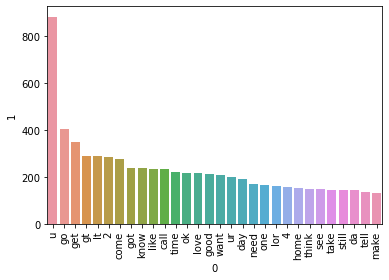

In [89]:
from collections import Counter

sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
#x axis read ni kr pare h toh usko 
plt.xticks(rotation="vertical")

# 4.MODEL BUILDING 

In [90]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

cv=CountVectorizer()
#ek baar hum tfidf use krre h as a vectorizerr x ko banane k liye
tfidf=TfidfVectorizer(max_features=3000)

In [91]:
#x=cv.fit_transform(df['transformed_text']).toarray()
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [92]:
df.head()

,target,text,num_char,num_words,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [93]:
# x=np.hstack(x,df['num_char'].values.reshape(-1,1))

In [94]:
x.shape

(5169, 3000)

In [95]:
#5169 are sms nd 6708 are words


In [96]:
y=df['target'].values

In [97]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [98]:
#after getting x and y we will apply train test split
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state =2)


In [100]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [101]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [102]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [103]:
#preciosn score should n=be high
#lkin uper wale mein precision score bhut hi km h thereforen thoda khrb model h


In [104]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [105]:
# uper wale model ki acuuracy bhut acchi h but precison abhi bhi km h
#imbalace data hai yhn accuracy jyada matter ni krta hai precision jyada matter krta h


In [106]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [107]:
# this is performing good tfidf ->mnb
#ab or machine learning models ke sath check krenge


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement xgbooster (from versions: none)
ERROR: No matching distribution found for xgbooster


In [110]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [112]:
# sbka objects create krenge 
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [113]:
#dictionary banaya jisme keys mein algo n values m obj k naam 
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    
}

In [114]:
# ek funcitonn banayenge jisko clsfier denge or training or testing data denge
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [115]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [116]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9294003868471954
Precision -  0.8282828282828283
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192


In [117]:
# inko datafram mein convert kar denge
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [118]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
3,DT,0.929400,0.828283


In [119]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [120]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.929400


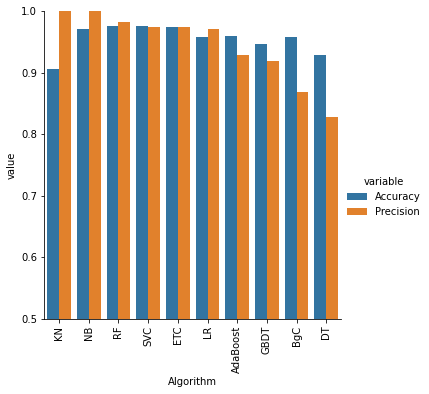

In [121]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [123]:
# modelimprovement 
#change the max features parameter of tfidf
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [124]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [125]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [126]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [127]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [128]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283,0.929400,0.828283


In [129]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [130]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [132]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [133]:
y_pred = voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [134]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [135]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))